## Project: Malaria Prediction

#### Let us import useful librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Let see our dataset

In [3]:
dataset = pd.read_csv('malaria_prediction.csv')
dataset

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,0,Male,yes,no,no,no,no,yes,no,no,no,no,yes,no,yes,yes,no,no
1,1,Male,no,no,yes,yes,yes,no,no,no,no,no,yes,no,no,no,no,no
2,0,Female,yes,no,no,yes,no,yes,no,yes,yes,no,no,yes,yes,no,no,no
3,1,Female,yes,yes,yes,no,yes,no,no,no,no,yes,yes,yes,yes,no,yes,no
4,1,Female,yes,yes,yes,no,yes,no,no,yes,yes,yes,yes,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Female,yes,yes,no,yes,yes,no,no,yes,no,no,yes,yes,yes,no,no,no
996,0,Male,no,no,yes,no,no,yes,no,no,no,no,yes,yes,yes,yes,yes,no
997,1,Male,yes,yes,yes,yes,yes,no,no,no,no,no,yes,no,yes,no,no,no
998,0,Female,no,yes,no,no,yes,yes,no,no,no,no,yes,yes,yes,no,no,yes


In [4]:
#Let us see the shape of our dataset
print('------------------')
print('The shape is', dataset.shape)

------------------
The shape is (1000, 18)


In [5]:
# Let us see how the first six lines presented
dataset.head(6)

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,0,Male,yes,no,no,no,no,yes,no,no,no,no,yes,no,yes,yes,no,no
1,1,Male,no,no,yes,yes,yes,no,no,no,no,no,yes,no,no,no,no,no
2,0,Female,yes,no,no,yes,no,yes,no,yes,yes,no,no,yes,yes,no,no,no
3,1,Female,yes,yes,yes,no,yes,no,no,no,no,yes,yes,yes,yes,no,yes,no
4,1,Female,yes,yes,yes,no,yes,no,no,yes,yes,yes,yes,yes,no,no,no,no
5,0,Female,yes,yes,no,yes,yes,no,yes,yes,no,no,yes,yes,no,no,no,no


In [6]:
# Let us see how the output is presented
y = dataset['severe_maleria']
y.head(6)

0    no
1    no
2    no
3    no
4    no
5    no
Name: severe_maleria, dtype: object

#### Let us do a one hot encoding  to convert categories data into numbers

In [10]:
encoding= {"fever":{"no":0, "yes":1},"cold":{"no":0, "yes":1},"rigor":{"no":0, "yes":1},"fatigue":{"no":0, "yes":1},
          "headace":{"no":0, "yes":1},"bitter_tongue":{"no":0, "yes":1},"vomitting":{"no":0, "yes":1},
          "diarrhea":{"no":0, "yes":1},"Convulsion":{"no":0, "yes":1},"Anemia":{"no":0, "yes":1},"jundice":{"no":0, "yes":1},
          "cocacola_urine":{"no":0, "yes":1},"hypoglycemia":{"no":0, "yes":1},"prostraction":{"no":0, "yes":1},
          "hyperpyrexia":{"no":0, "yes":1},"hyperpyrexia":{"no":0, "yes":1},"severe_maleria":{"no":0, "yes":1}}

In [11]:
dataset.replace(encoding,inplace=True)

In [12]:
# Let us see the output after the encoding
y = dataset['severe_maleria']
y.head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: severe_maleria, dtype: int64

In [13]:
# Let us check if there are some missing data
dataset.isnull().sum()

age               0
sex               0
fever             0
cold              0
rigor             0
fatigue           0
headace           0
bitter_tongue     0
vomitting         0
diarrhea          0
Convulsion        0
Anemia            0
jundice           0
cocacola_urine    0
hypoglycemia      0
prostraction      0
hyperpyrexia      0
severe_maleria    0
dtype: int64

####  Let us see the statistics of each feature

In [14]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,0.512,0.500106,0.0,0.0,1.0,1.0,1.0
fever,1000.0,0.742,0.437753,0.0,0.0,1.0,1.0,1.0
cold,1000.0,0.564,0.496135,0.0,0.0,1.0,1.0,1.0
rigor,1000.0,0.346,0.475931,0.0,0.0,0.0,1.0,1.0
fatigue,1000.0,0.524,0.499674,0.0,0.0,1.0,1.0,1.0
headace,1000.0,0.714,0.452115,0.0,0.0,1.0,1.0,1.0
bitter_tongue,1000.0,0.430,0.495323,0.0,0.0,0.0,1.0,1.0
vomitting,1000.0,0.101,0.301480,0.0,0.0,0.0,0.0,1.0
diarrhea,1000.0,0.345,0.475606,0.0,0.0,0.0,1.0,1.0
Convulsion,1000.0,0.361,0.480531,0.0,0.0,0.0,1.0,1.0


In [16]:
new_data = dataset.drop('severe_maleria', axis=1)
new_data.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia
0,0,Male,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,1,Male,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
2,0,Female,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
3,1,Female,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1
4,1,Female,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0


In [17]:
new_data = pd.get_dummies(new_data)
new_data

,age,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,sex_Female,sex_Male
0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0
3,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,1,0
4,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0
996,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,1
997,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1
998,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0


In [18]:
#new_malaria = new_malaria.drop('age')
new_data

,age,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,sex_Female,sex_Male
0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0
3,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,1,0
4,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0
996,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,1
997,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1
998,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0


###  Statistics of people healthy and not

In [19]:
print(dataset.groupby('severe_maleria').size())

severe_maleria
0    677
1    323
dtype: int64


## Visualization

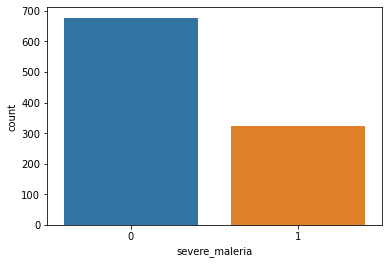

In [20]:
# Let us visualize the proportion
sns.countplot(dataset['severe_maleria'],label="Count")
plt.show()

#### Let us  visualize the correlation

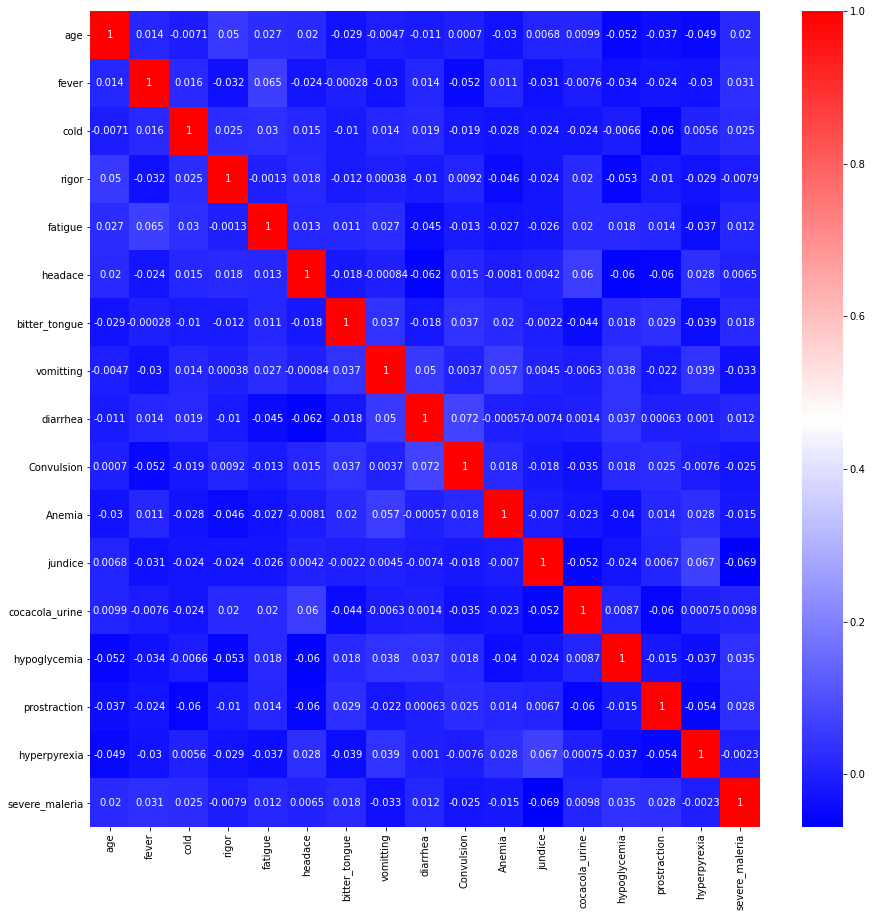

In [22]:
# Let us check the correlation between features 
correlation = dataset.corr()
corr_feature = correlation.index
plt.figure(figsize=(15, 15))


map_ = sns.heatmap(dataset[corr_feature].corr(), annot= True, cmap='bwr')

In [23]:
# Let us see the correlation in values
dataset.corr()

,age,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
age,1.000000,0.014156,-0.007133,0.049828,0.026887,0.019621,-0.028933,-0.004727,-0.011110,0.000700,-0.030322,0.006810,0.009929,-0.052081,-0.036938,-0.048915,0.019782
fever,0.014156,1.000000,0.016187,-0.032345,0.064948,-0.024216,-0.000277,-0.029900,0.014472,-0.051689,0.011145,-0.031266,-0.007562,-0.034439,-0.024051,-0.029932,0.030958
cold,-0.007133,0.016187,1.000000,0.024825,0.030138,0.014744,-0.010265,0.013626,0.018750,-0.019331,-0.028068,-0.023568,-0.023548,-0.006562,-0.059672,0.005646,0.025133
rigor,0.049828,-0.032345,0.024825,1.000000,-0.001280,0.018403,-0.011804,0.000377,-0.010481,0.009165,-0.046087,-0.023568,0.020158,-0.053160,-0.010328,-0.028828,-0.007903
fatigue,0.026887,0.064948,0.030138,-0.001280,1.000000,0.012690,0.010839,0.027085,-0.045407,-0.013191,-0.027199,-0.026438,0.019876,0.018327,0.014394,-0.037215,0.011767
headace,0.019621,-0.024216,0.014744,0.018403,0.012690,1.000000,-0.017969,-0.000837,-0.062054,0.014956,-0.008126,0.004205,0.060355,-0.060488,-0.059830,0.028151,0.006521
bitter_tongue,-0.028933,-0.000277,-0.010265,-0.011804,0.010839,-0.017969,1.000000,0.037337,-0.018484,0.036883,0.020190,-0.002170,-0.044286,0.017752,0.029172,-0.039412,0.017753
vomitting,-0.004727,-0.029900,0.013626,0.000377,0.027085,-0.000837,0.037337,1.000000,0.049950,0.003724,0.057225,0.004495,-0.006290,0.038475,-0.021930,0.038815,-0.032809
diarrhea,-0.011110,0.014472,0.018750,-0.010481,-0.045407,-0.062054,-0.018484,0.049950,1.000000,0.072072,-0.000572,-0.007378,0.001352,0.037462,0.000635,0.001044,0.011539
Convulsion,0.000700,-0.051689,-0.019331,0.009165,-0.013191,0.014956,0.036883,0.003724,0.072072,1.000000,0.018312,-0.018320,-0.035048,0.017681,0.025110,-0.007551,-0.024947


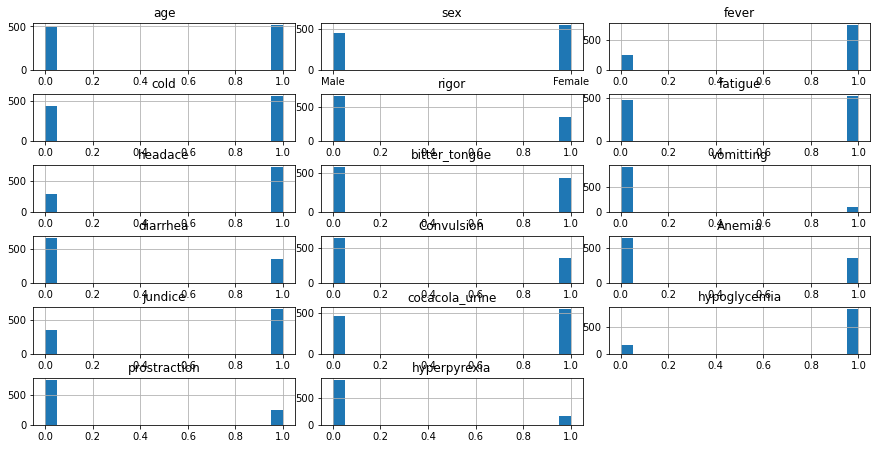

In [24]:
# Let us see the distribution in each feature
import itertools

features_ = dataset.columns[:17]
plt.subplots(figsize = (15, 10))
length = len(features_)

for value_1, value_2 in itertools.zip_longest(features_, range(length)):
    plt.subplot((length/2), 3, value_2 + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[value_1].hist(bins = 20)
    plt.title(value_1)
plt.show()

## Choice of Model

#### Let us split the dataset

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.3, random_state=0)

#### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logis_reg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logis_reg.score(X_test, y_test)))

Training set accuracy: 0.674
Test set accuracy: 0.683


#### Random Forest¶

In [27]:
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier(n_estimators=100, random_state=0)
randf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(randf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(randf.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.653


#### Support Vector Machine

In [28]:
from sklearn.svm import SVC

supv_clas = SVC()
supv_clas.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(supv_clas.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(supv_clas.score(X_test, y_test)))

Accuracy on training set: 0.68
Accuracy on test set: 0.68


#### Neural Network

In [30]:
#  Let us see the performance using the Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=None)
nn.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(nn.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(nn.score(X_test, y_test)))

Accuracy on training set: 0.79
Accuracy on test set: 0.63


/home/joram/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
